# Calibration for all countries with pre-defined functions

In [1]:
from impact_calc import *

/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(


In [2]:
input_sudan_noprot = calibration_input("sudan", "flood_depth")

Loading hazard
2024-04-22 16:59:43,461 - climada.hazard.base - WARNING - Failed to read values of 'time' as dates. Hazard.event_name will be empty strings
Loading exposure
Loading data
Assigning centroids
Creating input


In [6]:
from climada.util.calibrate import BayesianOptimizerController
from climada.util import log_level

opt = MultiExpBayesianOptimizer(input_sudan_noprot)
controller = BayesianOptimizerController.from_input(input_sudan_noprot, sampling_base=4.5)

with log_level("INFO", "climada.util.calibrate"):
    with log_level("ERROR", "climada.engine.impact"):
        res = opt.run(controller)
res.params

2024-04-22 11:12:50,768 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-22 11:16:02,919 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-22 11:19:11,947 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 2
2024-04-22 11:22:37,963 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 3
2024-04-22 11:25:49,699 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 4
2024-04-22 11:29:01,180 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 5
2024-04-22 11:32:09,161 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 6
2024-04-22 11:35:30,112 - climada.util.calibrate.bayesian_optimizer - INFO - No improvement. Stop optimization.


{'ratio': 0.13430851512224806, 'threshold': 0.7290716128686453}

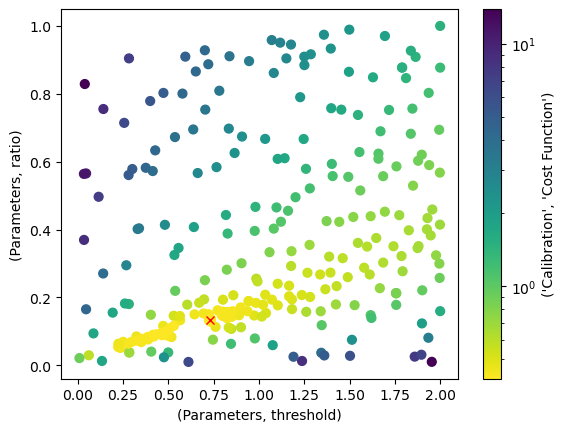

In [7]:
import matplotlib.colors as mcolors

ax = res.plot_p_space(
    x="threshold",
    y="ratio",
    norm=mcolors.LogNorm(),
)

In [11]:
res.p_space_to_dataframe().to_hdf("data/generated/sudan/calibration-pspace.h5", key="no_protection", mode="a")

In [8]:
controller.improvements()

,iteration,random,target,improvement
sample,,,,
0,0,True,-0.777793,inf
3,0,True,-0.575371,0.351813
15,0,True,-0.560867,0.025859
23,0,False,-0.509080,0.101726
26,0,False,-0.490705,0.037446
29,0,False,-0.433847,0.131057
72,1,False,-0.429750,0.009533
116,2,False,-0.428752,0.002328
118,2,False,-0.428602,0.000349


Loading hazard
2024-04-22 11:46:43,024 - climada.hazard.base - WARNING - Failed to read values of 'time' as dates. Hazard.event_name will be empty strings
Loading exposure
Loading data
Assigning centroids
Creating input
2024-04-22 11:46:51,444 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-22 11:50:03,136 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-22 11:53:14,113 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 2
2024-04-22 11:56:28,590 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 3
2024-04-22 11:59:57,438 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 4
2024-04-22 12:03:42,210 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 5
2024-04-22 12:07:17,043 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 6
2024-04-22 12:10:54,804 - climada.util.calibrate.bayesian_o

RasterioIOError: /Users/ldr.riedel/experiments/displacement-mip/data/worldpop/somalia/SOM_ppp_2008_1km_Aggregated_UNadj.tif: No such file or directory

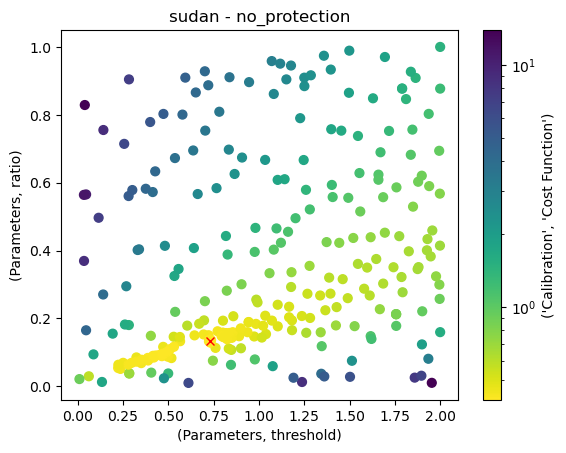

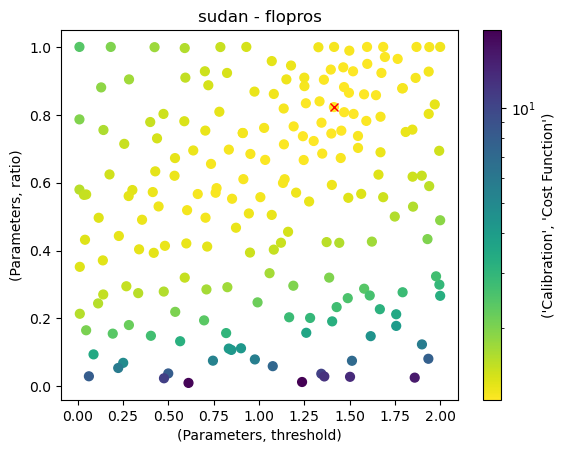

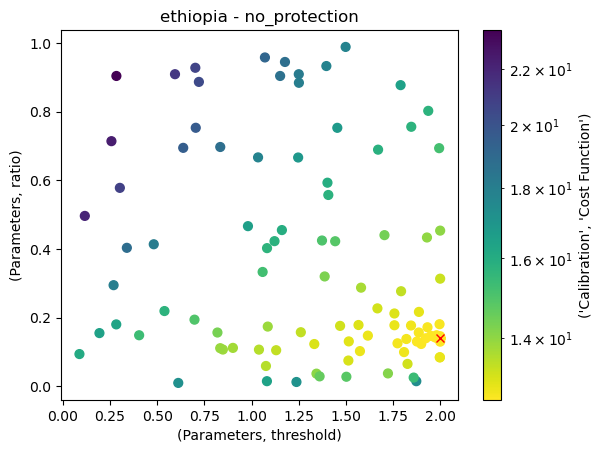

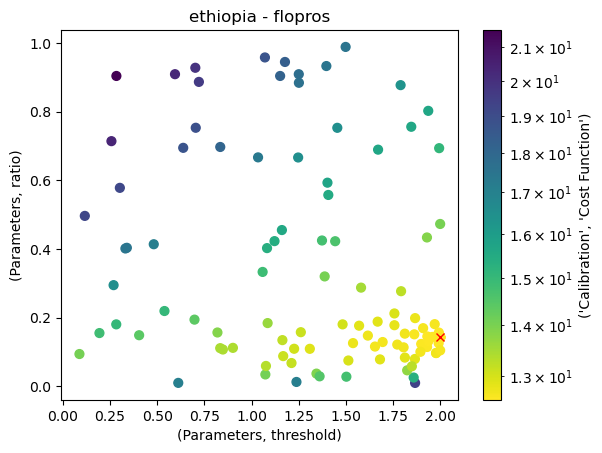

In [ ]:
from itertools import product

countries = ("sudan", "ethiopia", "somalia")
protection = ("no_protection", "flopros")
year_range = np.arange(2008, 2021 + 1)

for ctry, prot in product(countries, protection):
    intensity = "flood_depth" if prot == "no_protection" else "flood_depth_flopros"

    inp = calibration_input(ctry, intensity)
    inp.hazard = inp.hazard.select(event_id=year_range.tolist())
    opt = MultiExpBayesianOptimizer(inp)
    controller = BayesianOptimizerController.from_input(inp, sampling_base=4.5)

    with log_level("INFO", "climada.util.calibrate"):
        with log_level("ERROR", "climada.engine.impact"):
            res = opt.run(controller)
            res.p_space_to_dataframe().to_hdf(
                f"data/generated/{ctry}/calibration-pspace.h5", key=prot, mode="a"
            )
            ax = res.plot_p_space(
                x="threshold",
                y="ratio",
                norm=mcolors.LogNorm(),
            )
            ax.set_title(f"{ctry} - {prot}")

Loading hazard
2024-04-22 14:38:14,779 - climada.hazard.base - WARNING - Failed to read values of 'time' as dates. Hazard.event_name will be empty strings
Loading exposure
Loading data
Assigning centroids
Creating input
2024-04-22 14:38:21,314 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-22 14:40:58,776 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-22 14:43:16,054 - climada.util.calibrate.bayesian_optimizer - INFO - No improvement. Stop optimization.
Loading hazard
2024-04-22 14:43:16,865 - climada.hazard.base - WARNING - Failed to read values of 'time' as dates. Hazard.event_name will be empty strings
Loading exposure
Loading data
Assigning centroids
Creating input
2024-04-22 14:43:23,498 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-22 14:45:44,839 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-22 14:48:15,103 - climada.ut

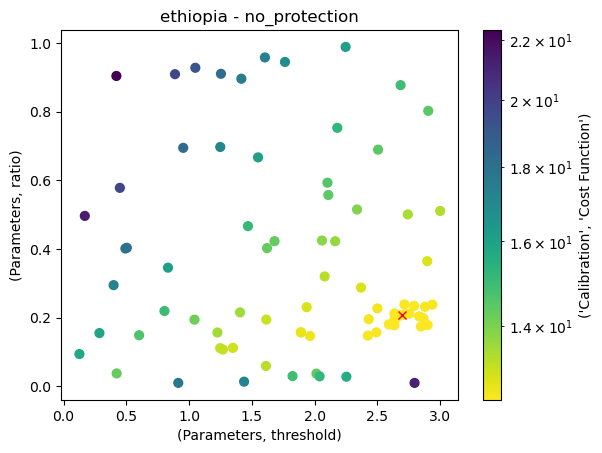

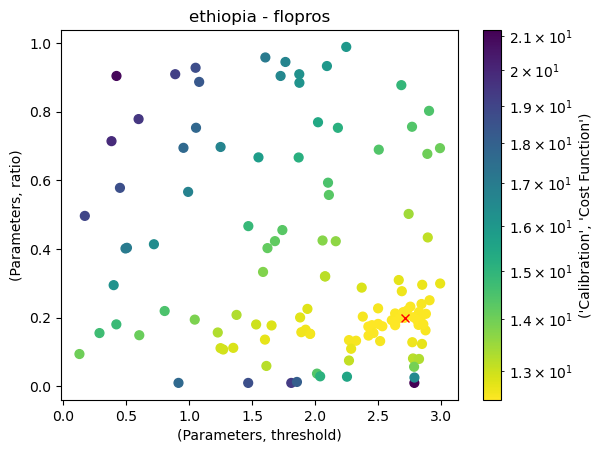

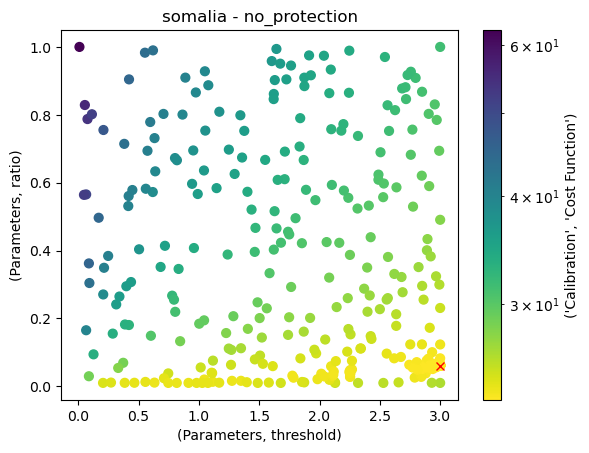

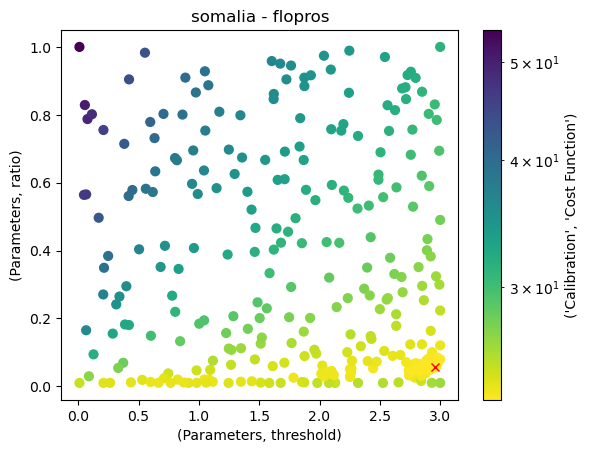

In [21]:
countries = ("ethiopia", "somalia")
protection = ("no_protection", "flopros")

for ctry, prot in product(countries, protection):
    intensity = "flood_depth" if prot == "no_protection" else "flood_depth_flopros"

    inp = calibration_input(ctry, intensity)
    opt = MultiExpBayesianOptimizer(inp)
    controller = BayesianOptimizerController.from_input(inp, sampling_base=4.5)

    with log_level("INFO", "climada.util.calibrate"):
        with log_level("ERROR", "climada.engine.impact"):
            res = opt.run(controller)
            res.p_space_to_dataframe().to_hdf(
                f"data/generated/{ctry}/calibration-pspace.h5", key=prot, mode="a"
            )
            ax = res.plot_p_space(
                x="threshold",
                y="ratio",
                norm=mcolors.LogNorm(),
            )
            ax.set_title(f"{ctry} - {prot}")

In [16]:
from impact_calc import PersistingMultiExpBayesianOptimizer
from climada.util.calibrate import BayesianOptimizerController
from climada.util import log_level
import cProfile

opt = PersistingMultiExpBayesianOptimizer(input_sudan_noprot)
controller = BayesianOptimizerController.from_input(
    input_sudan_noprot, sampling_base=3, max_iterations=3
)

with cProfile.Profile() as pr:
    with log_level("INFO", "climada.util.calibrate"):
        with log_level("ERROR", "climada.engine.impact"):
            res = opt.run(controller)
pr.dump_stats("new.prof")

2024-04-24 11:12:26,689 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-24 11:13:12,795 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-24 11:13:57,092 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 2


In [17]:
from impact_calc import PersistingMultiExpBayesianOptimizer
from climada.util.calibrate import BayesianOptimizerController
from climada.util import log_level
import cProfile

input_sudan_noprot.impact_calc_kwds = {"assign_centroids": False, "save_mat": True}
opt = MultiExpBayesianOptimizer(input_sudan_noprot)
controller = BayesianOptimizerController.from_input(
    input_sudan_noprot, sampling_base=3, max_iterations=3
)

with cProfile.Profile() as pr:
    with log_level("INFO", "climada.util.calibrate"):
        with log_level("ERROR", "climada.engine.impact"):
            res = opt.run(controller)
pr.dump_stats("old.prof")

2024-04-24 11:14:45,336 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 0
2024-04-24 11:16:18,260 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 1
2024-04-24 11:17:47,597 - climada.util.calibrate.bayesian_optimizer - INFO - Optimization iteration: 2


In [26]:
import cProfile, pstats, io
from pstats import SortKey

from climada.util import log_level

with cProfile.Profile() as pr:
    with log_level("ERROR"):
        MultiExpImpactCalc(
            exposures=input_sudan_noprot.exposure,
            impfset=input_sudan_noprot.impact_func_creator(threshold=1, ratio=0.5),
            hazard=input_sudan_noprot.hazard,
        ).impact(save_mat=False, assign_centroids=False)
    # ImpactCalc(
    #     exposures=next(iter(input_sudan_noprot.exposure.values())),
    #     impfset=input_sudan_noprot.impact_func_creator(**res.params),
    #     hazard=input_sudan_noprot.hazard,
    # ).impact(save_mat=False, assign_centroids=False)
    pr.dump_stats("multi.prof")
    s = io.StringIO()
    sortby = SortKey.CUMULATIVE
    ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
    ps.print_stats(40)
    print(s.getvalue())

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/fj/w4lbl0pd7l1gcvt664mkfnh00000gq/T/ipykernel_15380/1245196432.py", line 8, in <module>
    MultiExpImpactCalc(
  File "/Users/ldr.riedel/experiments/displacement-mip/impact_calc.py", line 214, in impact
    return self._return_impact(imp_mat_gen, save_mat)
  File "/Users/ldr.riedel/experiments/displacement-mip/impact_calc.py", line 215, in <listcomp>
  File "/Users/ldr.riedel/coding/climada_python/climada/engine/impact_calc.py", line 148, in impact
    return self._return_impact(imp_mat_gen, save_mat)
  File "/Users/ldr.riedel/coding/climada_python/climada/engine/impact_calc.py", line 176, in _return_impact
    at_event, eai_exp, aai_agg = self.stitch_risk_metrics(imp_mat_gen)
  File "/Users/ldr.riedel/coding/climada_python/climada/eng

In [31]:
import cProfile, pstats, io
from pstats import SortKey
from impact_calc import PersistingImpactCalc

with cProfile.Profile() as pr:
    with log_level("ERROR"):
        PersistingImpactCalc(
            exposures=next(iter(input_sudan_noprot.exposure.values())),
            impfset=input_sudan_noprot.impact_func_creator(threshold=1, ratio=0.5),
            hazard=input_sudan_noprot.hazard,
            assign_centroids=False,
        ).impact(save_mat=True)
    pr.dump_stats("persist.prof")
    s = io.StringIO()
    sortby = SortKey.CUMULATIVE
    ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
    ps.print_stats(40)
    print(s.getvalue())

         217692 function calls (217651 primitive calls) in 1.412 seconds

   Ordered by: cumulative time
   List reduced from 517 to 40 due to restriction <40>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.198    1.198 /Users/ldr.riedel/experiments/displacement-mip/impact_calc.py:170(impact)
        1    0.004    0.004    1.197    1.197 /Users/ldr.riedel/coding/climada_python/climada/engine/impact_calc.py:150(_return_impact)
        1    0.015    0.015    1.038    1.038 /Users/ldr.riedel/coding/climada_python/climada/engine/impact_calc.py:388(stitch_impact_matrix)
        1    0.066    0.066    0.599    0.599 /Users/ldr.riedel/coding/climada_python/climada/engine/impact_calc.py:394(<listcomp>)
        2    0.005    0.003    0.328    0.164 /Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/site-packages/scipy/sparse/_compressed.py:357(multiply)
        2    0.000    0.000    0.313    0.156 /Users/ldr.riedel/minifor

In [2]:
from itertools import product
import matplotlib.colors as mcolors
from multiprocessing.pool import Pool

from climada.util import log_level
from climada.util.calibrate import BayesianOptimizerController

countries = ("ethiopia", "somalia", "sudan")
protection = ("no_protection", "flopros")

def calibrate(ctry, prot):
    intensity = "flood_depth" if prot == "no_protection" else "flood_depth_flopros"

    inp = calibration_input(ctry, intensity, "sigmoid")
    opt = PersistingMultiExpBayesianOptimizer(inp)
    controller = BayesianOptimizerController.from_input(inp, sampling_base=5)

    with log_level("ERROR", "climada.util.calibrate"):
        with log_level("ERROR", "climada.engine.impact"):
            res = opt.run(controller)
            res.p_space_to_dataframe().to_hdf(
                f"data/generated/{ctry}/calibration-sigmoid-pspace.h5",
                key=prot,
                mode="a",
            )
            ax = res.plot_p_space(
                x="half_point",
                y="upper_limit",
                norm=mcolors.LogNorm(),
            )
            ax.set_title(f"{ctry} - {prot}")
            return ax

with Pool(processes=2) as pool:
    axes = pool.starmap(calibrate, product(countries, protection))

axes

Process SpawnPoolWorker-2:
Process SpawnPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ldr.riedel/miniforge3/envs/climada_env_3.9/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._

KeyboardInterrupt: 